# P3

In [1]:
%load_ext autoreload

## Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al aplicar el método de interpolación por mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$


En caso de la ecuación de segundo grado:
$  f(x) = a x^2+ b x+c $

se obtiene 
$ ( \sum (y_i - a x_i^2 - b x_i -c ) ( x_i^2) ,  \sum (y_i - a x_i^2 - b x_i  -c) ( x_i), \sum (y_i - a x_i^2 - b x_i  -c )  ) = 0 $


In [2]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    n = len(xs)
    sum_xi_yi = sum(xs[i] * ys[i] for i in range(n))
    sum_xi = sum(xs)
    sum_xi2 = sum(xi**2 for xi in xs)
    sum_yi = sum(ys)

    c_1 = sum_xi2
    c_0 = sum_xi
    c_ind = sum_xi_yi

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    n = len(xs)
    sum_yi = sum(ys)
    sum_xi = sum(xs)

    c_1 = sum_xi
    c_0 = n
    c_ind = sum_yi

    return (c_1, c_0, c_ind)

## Conjunto de datos 1

In [3]:
xs = [
    1.1715,
    1.3396,
    1.4163,
    1.9962,
    2.2523,
    2.2947,
    2.5793,
    2.7054,
    2.7635,
    2.8200,
    3.0317,
    3.5111,
    3.5393,
    3.9829,
    4.0323,
    4.1353,
    4.2084,
    4.4683,
    4.6509,
    4.7489,
]


ys = [
    1.1902,
    0.9564,
    0.6078,
    -0.0856,
    -0.3550,
    0.1355,
    -0.3171,
    -0.3425,
    -0.3758,
    -0.1518,
    -0.2767,
    0.6251,
    0.6447,
    2.2733,
    2.1789,
    2.6781,
    2.3818,
    3.3786,
    4.4971,
    5.1431,
]

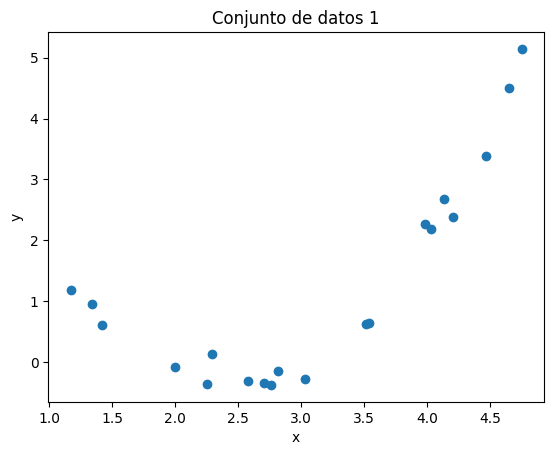

In [5]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [6]:
%autoreload 2
from src import ajustar_min_cuadrados
# Descomentar para probar la función

# pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])
# pars # parámetros de la curva ajustada

[08-14 08:26:56][INFO] 2024-08-14 08:26:56.296809
[08-14 08:26:56][INFO] 2024-08-14 08:26:56.306532
[08-14 08:26:56][INFO] 2024-08-14 08:26:56.313588
[08-14 08:26:56][INFO] 2024-08-14 08:26:56.319305


In [7]:
# ####################################################################
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a1, a0 = pars
    return a1 * x + a0

In [9]:
# ####################################################################
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    n = len(xs)
    sum_yi = sum(ys)
    sum_xi = sum(xs)
    sum_xi2 = sum(xi**2 for xi in xs)

    c_2 = sum_xi2
    c_1 = sum_xi
    c_0 = n
    c_ind = sum_yi

    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    n = len(xs)
    sum_xi_yi = sum(xs[i] * ys[i] for i in range(n))
    sum_xi = sum(xs)
    sum_xi2 = sum(xi**2 for xi in xs)
    sum_xi3 = sum(xi**3 for xi in xs)

    c_2 = sum_xi3
    c_1 = sum_xi2
    c_0 = sum_xi
    c_ind = sum_xi_yi

    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    n = len(xs)
    sum_xi2_yi = sum(xs[i]**2 * ys[i] for i in range(n))
    sum_xi2 = sum(xi**2 for xi in xs)
    sum_xi3 = sum(xi**3 for xi in xs)
    sum_xi4 = sum(xi**4 for xi in xs)

    c_2 = sum_xi4
    c_1 = sum_xi3
    c_0 = sum_xi2
    c_ind = sum_xi2_yi

    return (c_2, c_1, c_0, c_ind)

In [10]:
def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

In [11]:
# pars_cuad = ajustar_min_cuadrados(
#     xs,
#     ys,
#     gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol],
# )
# print(pars_cuad)

Su imagen debe ser similar a:

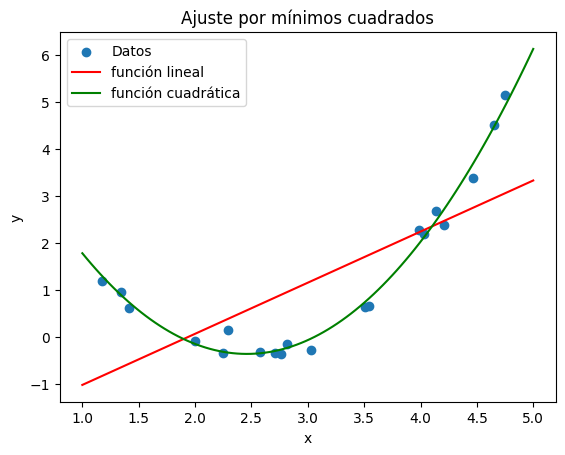

# Indicaciones
Su trabajo es ajustar el código para utilizar una función lineal y una cuadrática que aproxime los puntos. Tenga en cuenta las siguientes consideraciones:
* Usar el método de mínimos cuadrados para interpolar los puntos.
* Graficar la función cuadrática y los puntos dados.
* Modificar y utilizar SOLO el código provisto. No se aceptarán la utilización de otras librerías o funciones.

Coeficientes de la recta: [ 1.0875256  -2.11287847]
Coeficientes de la parábola: [ 1.00550151 -4.94621361  5.71726948]


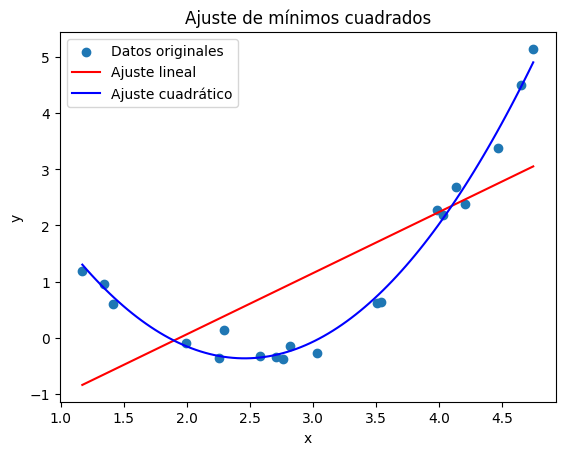

In [17]:
import numpy as np
# Función para ajustar los mínimos cuadrados
def ajustar_min_cuadrados(xs, ys, gradiente):
    A = []
    B = []
    for der_func in gradiente:
        coefs = der_func(xs, ys)
        A.append(coefs[:-1])
        B.append(coefs[-1])
    A = np.array(A)
    B = np.array(B)
# Resolver el sistema de ecuaciones
    params = np.linalg.solve(A, B)
    return params

# Funciones para la recta y la parábola
def linea(x: float, pars: tuple[float]) -> float:
    a1, a0 = pars
    return a1 * x + a0

def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0


# Ajuste para la recta
pars_lineal = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_1, der_parcial_0])

# Ajuste para la parábola
pars_cuad = ajustar_min_cuadrados(
    xs,
    ys,
    gradiente=[der_parcial_2_parabol, der_parcial_1_parabol, der_parcial_0_parabol],
)

print("Coeficientes de la recta:", pars_lineal)
print("Coeficientes de la parábola:", pars_cuad)

# Graficar los resultados
plt.scatter(xs, ys, label='Datos originales')

# Graficamos la recta ajustada
x_vals = np.linspace(min(xs), max(xs), 100)
y_vals_linea = [linea(x, pars_lineal) for x in x_vals]
plt.plot(x_vals, y_vals_linea, color='red', label='Ajuste lineal')

# Graficamos la parábola ajustada
y_vals_cuadratica = [cuadratica(x, pars_cuad) for x in x_vals]
plt.plot(x_vals, y_vals_cuadratica, color='blue', label='Ajuste cuadrático')

# Detalles del gráfico
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de mínimos cuadrados")
plt.legend()
plt.show()